In [ ]:
#load libraries.
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Load the data
tiktok = pd.read_csv('tiktok_dataset.csv')
tiktok.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
tiktok.shape

(19382, 12)

In [ ]:
tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:

cleaned_data = tiktok.dropna().reset_index(drop=True)
tiktok_data = cleaned_data
tiktok_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
tiktok_data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [ ]:
tiktok_data = tiktok_data.drop('#', axis=1)

In [ ]:
tiktok_data.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


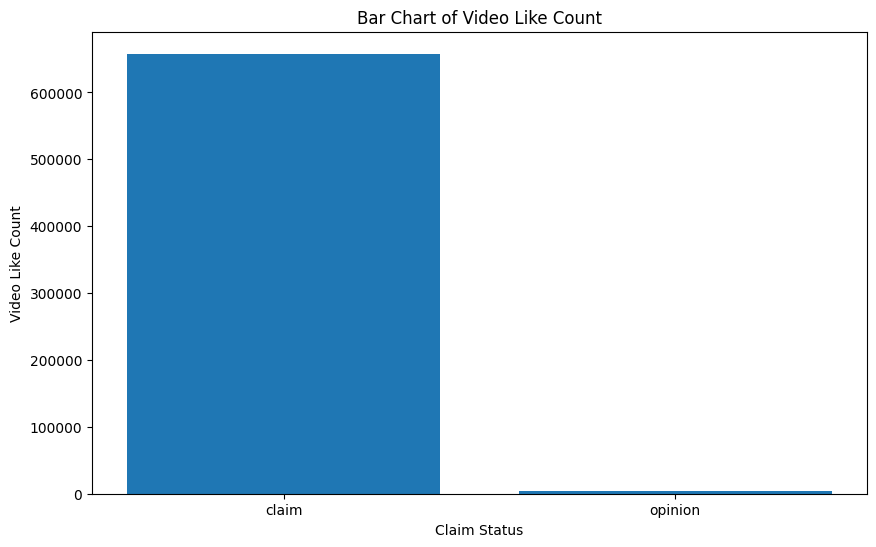

In [ ]:
# Bar chart for video_like_count
plt.figure(figsize=(10, 6))
plt.bar(tiktok_data['claim_status'], tiktok_data['video_like_count'])
plt.title('Bar Chart of Video Like Count')
plt.xlabel('Claim Status')
plt.ylabel('Video Like Count')
plt.show()

**nhận xét:**
- Số lượt thích video ở nhóm "claim" rất cao: trên 600000
- Số lượt thích video ở nhóm "opinion" lại rất thấp
1. Claim (tuyên bố) là một phát biểu được trình bày như là sự thật, thường là một điều gì đó gây tranh cãi hoặc cần được chứng minh. Trong  dự án TikTok , một claim có thể là một video đưa ra một tuyên bố cụ thể về một chủ đề cụ thể. Ví dụ: một video có thể claim rằng một loại thuốc hoặc phương pháp điều trị y tế cụ thể có hiệu quả, hoặc một video có thể đưa ra tuyên bố về một vấn đề chính trị hoặc xã hội.

2.
Opinion (ý kiến) là một quan điểm, niềm tin hoặc phán đoán cá nhân. Không giống như các claim, các opinion không nhất thiết phải dựa trên sự thật hoặc bằng chứng, và chúng có thể mang tính chủ quan hơn. Trong dự án của bạn, một opinion có thể là một video bày tỏ quan điểm hoặc niềm tin cá nhân về một chủ đề cụ thể. Ví dụ: một video có thể đưa ra ý kiến về một bộ phim, một bài hát hoặc một nhân vật của công chúng.

Numeric columns:
Index(['video_id', 'video_duration_sec', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count'],
      dtype='object')


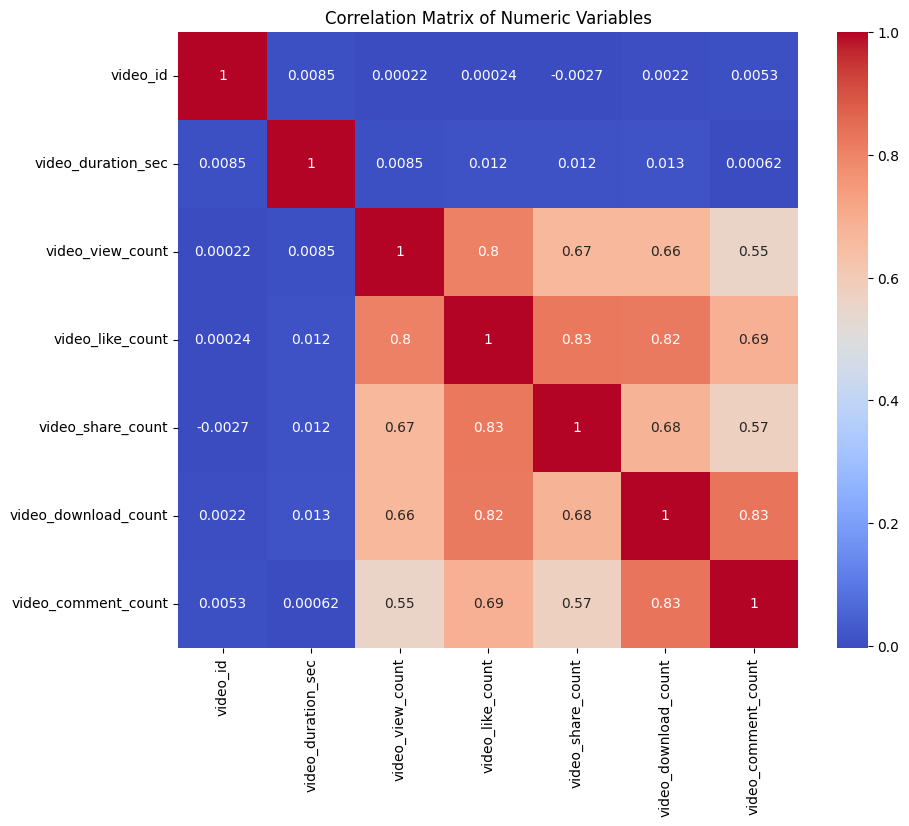

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = tiktok_data
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Numeric columns:")
print(numeric_cols)

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

**Nhận xét**
- video_view_count, video_like_count, video_share_count, video_download_count, và video_comment_count đều có mối tương quan dương mạnh với nhau
- video_like_count và video_view_count có hệ số tương quan khoảng 0.8, nghĩa là video càng có nhiều lượt xem thì cũng có nhiều lượt thích.
- video_id và video_duration_sec có có mối tương quan rất thấp với các biến khác

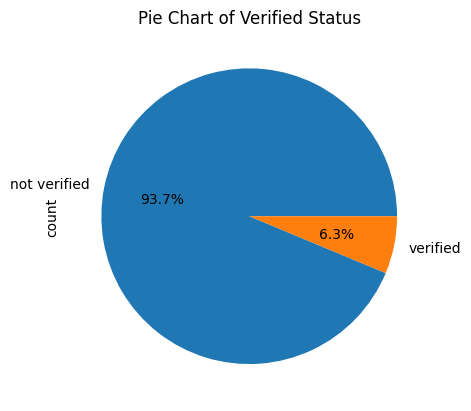

In [ ]:
df = tiktok_data
df['verified_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Verified Status')
plt.show()

**Nhận xét**
- Phần lớn tài khoản TikTok trong tập dữ liệu này chưa được xác minh. Điều này được thể hiện rõ ràng bởi phần lớn của biểu đồ hình tròn thuộc về nhóm "not verified".
- Chỉ một phần nhỏ tài khoản TikTok được xác minh. Phần nhỏ hơn của biểu đồ hình tròn đại diện cho nhóm "verified" cho thấy điều này.

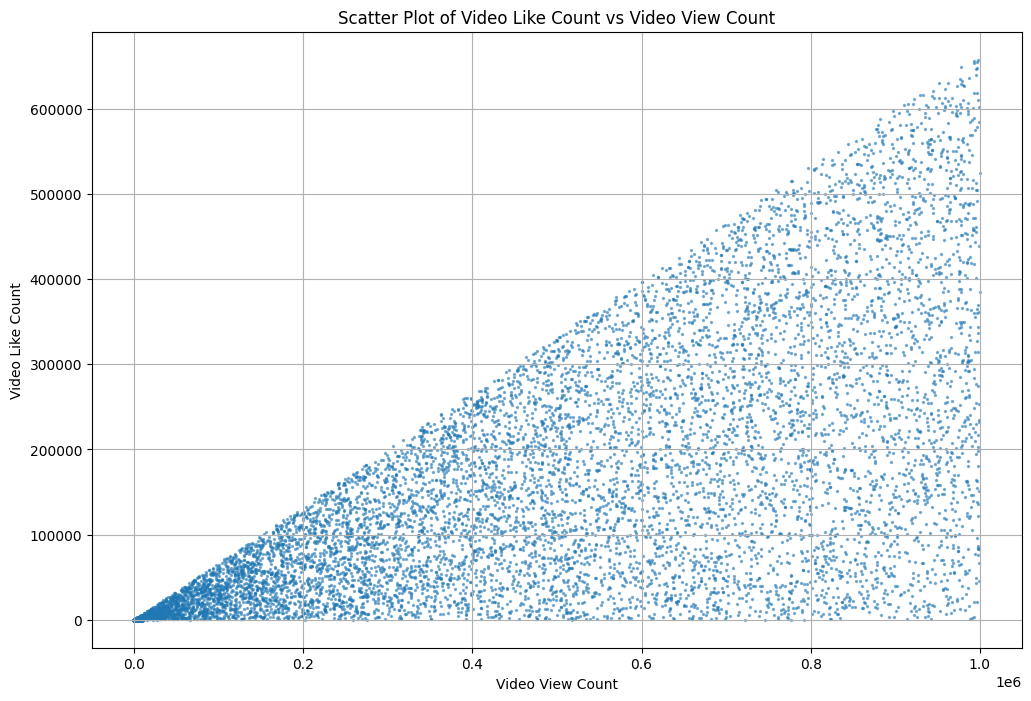

In [ ]:
# scatter plot of 'video_view_count' vs 'video_like_count'
plt.figure(figsize=(12,8))
plt.scatter(df['video_view_count'], df['video_like_count'], s=2, alpha=0.5)
plt.title('Scatter Plot of Video Like Count vs Video View Count')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')
plt.grid(True)

plt.show()

**Nhận xét**
•	Biểu đồ cho thấy một xu hướng tuyến tính dương, nghĩa là khi số lượt xem (Video View Count) tăng, thì số lượt thích (Video Like Count) cũng tăng. Điều này là hợp lý vì video có nhiều lượt xem thường có nhiều lượt thích hơn

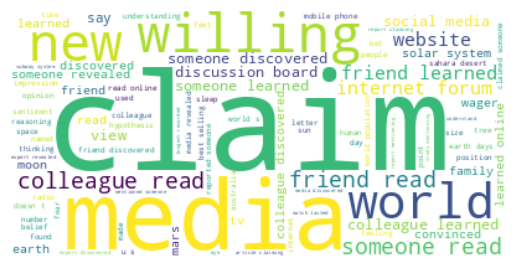

In [ ]:
from wordcloud import WordCloud

#wordcloud of 'video_transcription_text'
text = ' '.join(review for review in df['video_transcription_text'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Nhận xét**


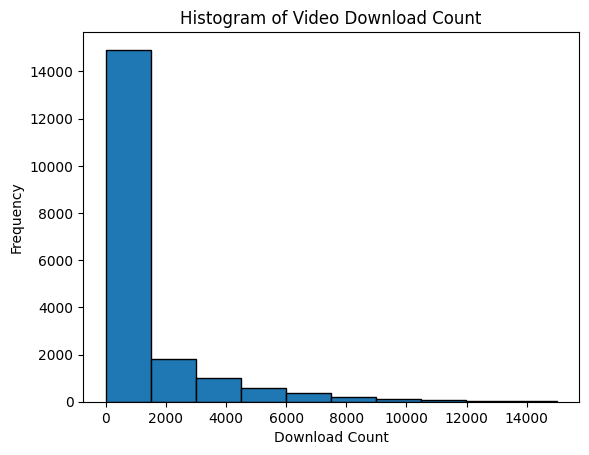

In [ ]:
import matplotlib.pyplot as plt

# Histogram of Video Download Count
plt.hist(df['video_download_count'], bins=10, edgecolor='black')
plt.title('Histogram of Video Download Count')
plt.xlabel('Download Count')
plt.ylabel('Frequency')
plt.show()

**Nhận xét**
- Đa số video có số lượt tải xuống rất thấp (tập trung ở cột đầu tiên).
- Số lượng video có lượt tải xuống cao rất ít (các cột phía bên phải có chiều cao thấp).


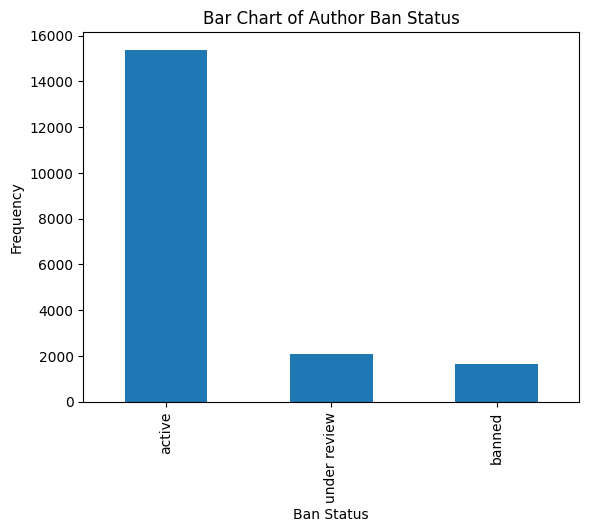

In [ ]:
df['author_ban_status'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Author Ban Status')
plt.xlabel('Ban Status')
plt.ylabel('Frequency')
plt.show()

**Nhận xét**
- Biểu đồ "Bart chart of Author Ban Status" hiển thị tần suất của mỗi trạng thái cấm tác giả trên TikTok. Trục ngang của biểu đồ hiển thị các trạng thái cấm tác giả khác nhau, bao gồm "active" (hoạt động), "under review" (đang xem xét) và "banned" (bị cấm). Trục dọc của biểu đồ hiển thị số lượng tác giả ở mỗi trạng thái.

- Nhìn vào biểu đồ, chúng ta có thể thấy rằng trạng thái cấm tác giả phổ biến nhất là "active", với hơn 1400 tác giả. Điều này có nghĩa là phần lớn các tác giả TikTok đang hoạt động và không bị cấm hoặc đang bị xem xét. - Trạng thái cấm tác giả tiếp theo là "under review", với khoảng 2000 tác giả. Điều này có nghĩa là có một số lượng tác giả đáng kể đang bị xem xét về các vi phạm chính sách của TikTok.
- Cuối cùng, trạng thái cấm tác giả ít phổ biến nhất là "banned", với khoảng 1000 tác giả. Điều này có nghĩa là số lượng tác giả bị cấm là tương đối nhỏ so với tổng số tác giả.

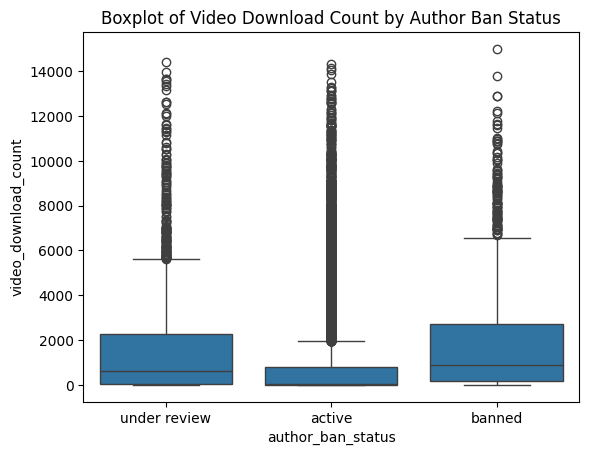

In [ ]:
import seaborn as sns

sns.boxplot(x='author_ban_status', y='video_download_count', data=df)
plt.title('Boxplot of Video Download Count by Author Ban Status')
plt.show()

- Tài khoản đang được xem xét (under review) có phân phối số lượt tải video rộng nhất: Điều này cho thấy sự biến động lớn về số lượt tải video của các tác giả đang được xem xét. Một số video có thể có lượt tải rất cao, trong khi một số khác lại có lượt tải rất thấp.
- Tài khoản hoạt động bình thường (active) có phân phối số lượt tải video hẹp nhất: Điều này cho thấy sự ổn định hơn về số lượt tải video của các tác giả hoạt động bình thường. Hầu hết các video đều có số lượt tải tương đối thấp.
- Tài khoản bị cấm (banned) có phân phối số lượt tải video nằm giữa hai loại còn lại: Điều này cho thấy sự biến động vừa phải về số lượt tải video của các tác giả bị cấm

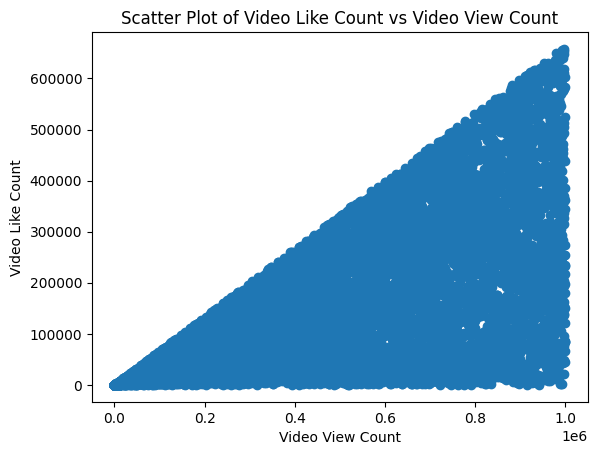

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['video_view_count'], df['video_like_count'])
plt.title('Scatter Plot of Video Like Count vs Video View Count')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')
plt.show()

- Biểu đồ "Scatter Plot of Video Like Count vs Video View Count" hiển thị mối quan hệ giữa số lượt xem video và số lượt thích video trên TikTok. Mỗi điểm trên biểu đồ đại diện cho một video, với tọa độ x là số lượt xem và tọa độ y là số lượt thích.

Nhận xét:

- Biểu đồ cho thấy một xu hướng tuyến tính dương, nghĩa là khi số lượt xem (Video View Count) tăng, thì số lượt thích (Video Like Count) cũng tăng. Điều này là hợp lý vì video có nhiều lượt xem thường có nhiều lượt thích hơn.
-Mối tương quan giữa hai biến này khá mạnh, được thể hiện bởi các điểm dữ liệu tập trung gần một đường thẳng tưởng tượng. Điều này cho thấy có một mối liên hệ chặt chẽ giữa số lượt xem và số lượt thích.
- Tuy nhiên, cũng có một số điểm dữ liệu nằm ngoài xu hướng chung. Những điểm này đại diện cho các video có số lượt thích cao hơn hoặc thấp hơn so với dự đoán dựa trên số lượt xem. Điều này có thể do nhiều yếu tố, chẳng hạn như nội dung video, chất lượng video, hoặc thời điểm đăng video.

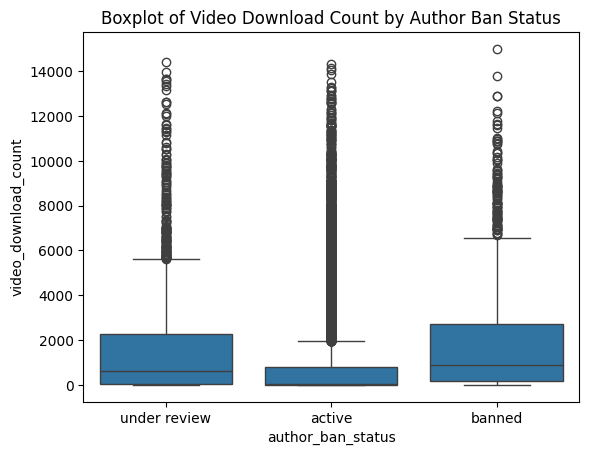

In [ ]:
import seaborn as sns

sns.boxplot(x='author_ban_status', y='video_download_count', data=df)
plt.title('Boxplot of Video Download Count by Author Ban Status')
plt.show()

Biểu đồ "Boxplot of Video Download Count by Author Ban Status" hiển thị phân bố số lượt tải xuống video theo trạng thái cấm của tác giả. Mỗi hộp (box) trong biểu đồ đại diện cho một nhóm tác giả dựa trên trạng thái cấm của họ ("active", "banned", "under review").

- under review" (Đang xem xét):
Sự phân tán rộng của dữ liệu cho thấy sự không đồng đều về số lượt tải video. Có thể có một số video rất phổ biến, trong khi một số khác lại không được chú ý nhiều.
Số lượng điểm ngoại lai lớn cho thấy có những video có số lượt tải đột biến, có thể do nội dung gây tranh cãi hoặc thu hút sự chú ý đặc biệt.
- "active" (Hoạt động):
Sự tập trung của dữ liệu cho thấy sự ổn định về số lượt tải video.
Số lượng điểm ngoại lai ít cho thấy hầu hết các video đều có số lượt tải tương đối đồng đều.
- "banned" (Bị cấm):
Dữ liệu cho thấy sự biến động ở mức trung bình.
Số lượng điểm ngoại lai lớn cho thấy có những video có số lượt tải rất cao, có thể do sự tò mò của người xem về lý do tài khoản bị cấm.

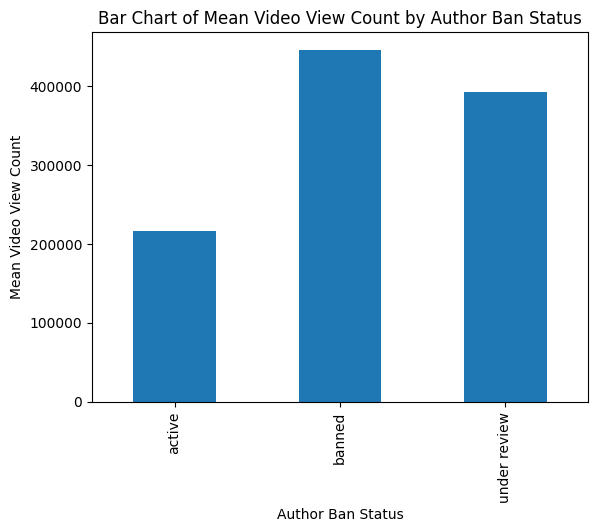

In [ ]:
df.groupby('author_ban_status')['video_view_count'].mean().plot(kind='bar')
plt.title('Bar Chart of Mean Video View Count by Author Ban Status')
plt.xlabel('Author Ban Status')
plt.ylabel('Mean Video View Count')
plt.show()

- Tài khoản bị cấm (banned) có số lượt xem video trung bình cao nhất: Điều này cho thấy rằng những video của các tác giả bị cấm có xu hướng thu hút nhiều lượt xem hơn. Có thể có một số lý do cho việc này, chẳng hạn như nội dung gây tranh cãi hoặc gây chú ý, hoặc có thể do người xem tò mò về lý do tại sao tài khoản bị cấm.
- Tài khoản đang được xem xét (under review) có số lượt xem video trung bình cao thứ hai: Điều này có thể cho thấy rằng các video của các tác giả đang được xem xét cũng thu hút được sự chú ý đáng kể. Có thể do nội dung của họ có tính gây tranh cãi hoặc có khả năng vi phạm các quy tắc của nền tảng.
- Tài khoản hoạt động bình thường (active) có số lượt xem video trung bình thấp nhất: Điều này không có nghĩa là các video của các tác giả hoạt động bình thường không phổ biến, mà chỉ là chúng có xu hướng có ít lượt xem trung bình hơn so với các video của các tác giả bị cấm hoặc đang được xem xét.

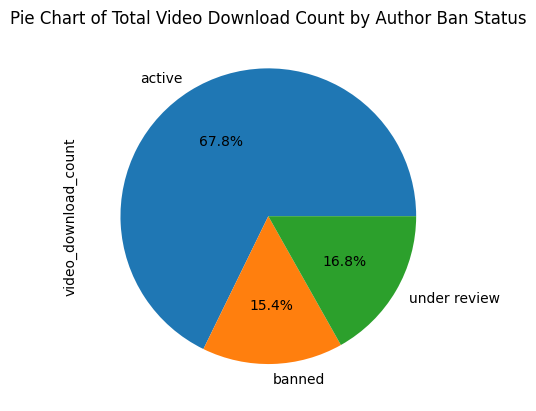

In [ ]:
df.groupby('author_ban_status')['video_download_count'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Total Video Download Count by Author Ban Status')
plt.show()



Biểu đồ tròn này thể hiện tổng số lượt tải video (video_download_count) theo trạng thái cấm tài khoản của tác giả (author_ban_status). Biểu đồ cho thấy tỷ lệ phần trăm của tổng số lượt tải video cho mỗi trạng thái cấm.


- Tài khoản hoạt động bình thường (active) chiếm tỷ lệ lớn nhất: 67.8% tổng số lượt tải video đến từ các tài khoản hoạt động bình thường. Điều này cho thấy rằng phần lớn lượt tải video đến từ các video của các tác giả không bị cấm hoặc đang được xem xét.
- Tài khoản đang được xem xét (under review) và tài khoản bị cấm (banned) chiếm tỷ lệ tương đối nhỏ: Lần lượt là 16.8% và 15.4%. Điều này cho thấy rằng số lượt tải video từ các tài khoản đang được xem xét hoặc bị cấm ít hơn nhiều so với tài khoản hoạt động bình thường.

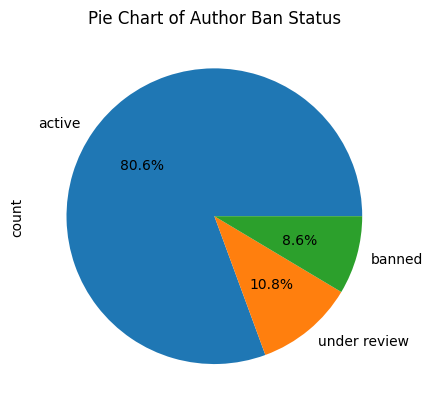

In [ ]:
import matplotlib.pyplot as plt

# pie chart of Author ban Status
df['author_ban_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Author Ban Status')
plt.show()

**Data Engineering**

In [ ]:
# Investigate the class balance for the `claim_status` variable
df["claim_status"].value_counts()

,count
claim_status,
claim,9608
opinion,9476


Kết quả cho thấy có 9608 bản ghi với claim_status là "claim" và 9476 bản ghi với claim_status là "opinion". Điều này cho thấy tập dữ liệu khá cân bằng giữa hai lớp

In [ ]:
# Determine the average view counts of videos with a "claim" status
claims =df[df["claim_status"] == "claim"]  # use a Boolean mask to subset data
print("Mean:", "%.2f" % claims["video_view_count"].mean())
print("Median:", claims["video_view_count"].median())

Mean: 501029.45
Median: 501555.0


In [ ]:
# Determine the average view counts of videos with an "opinion" status
opinions = df[df["claim_status"] == "opinion"]  # use a Boolean mask to subset data
print("Mean:", "%.2f" % opinions["video_view_count"].mean())
print("Median:", opinions["video_view_count"].median())

Mean: 4956.43
Median: 4953.0


Sự khác biệt lớn về số lượt xem: Có một sự khác biệt rất lớn về số lượt xem trung bình và trung vị giữa các video có claim_status là "claim" và "opinion". Các video có claim_status là "claim" có số lượt xem trung bình và trung vị cao hơn đáng kể so với các video có claim_status là "opinion".

In [ ]:
# Determine counts for each group combination of `claim_status`
# and `author_ban_status`
df.groupby(["claim_status", "author_ban_status"]).count()

video_id  video_duration_sec  \
claim_status author_ban_status                                 
claim        active                 6566                6566   
             banned                 1439                1439   
             under review           1603                1603   
opinion      active                 8817                8817   
             banned                  196                 196   
             under review            463                 463   

                                video_transcription_text  verified_status  \
claim_status author_ban_status                                              
claim        active                                 6566             6566   
             banned                                 1439             1439   
             under review                           1603             1603   
opinion      active                                 8817             8817   
             banned                                  196              196   
             under review                            463              463   

                                video_view_count  video_like_count  \
claim_status author_ban_status                                       
claim        active                         6566              6566   
             banned                         1439              1439   
             under review                   1603              1603   
opinion      active                         8817              8817   
             banned                          196               196   
             under review                    463               463   

                                video_share_count  video_download_count  \
claim_status author_ban_status                                            
claim        active                          6566                  6566   
             banned                          1439                  1439   
             under review                    1603                  1603   
opinion      active                          8817                  8817   
             banned                           196                   196   
             under review                     463                   463   

                                video_comment_count  
claim_status author_ban_status                       
claim        active                            6566  
             banned                            1439  
             under review                      1603  
opinion      active                            8817  
             banned                             196  
             under review                       463

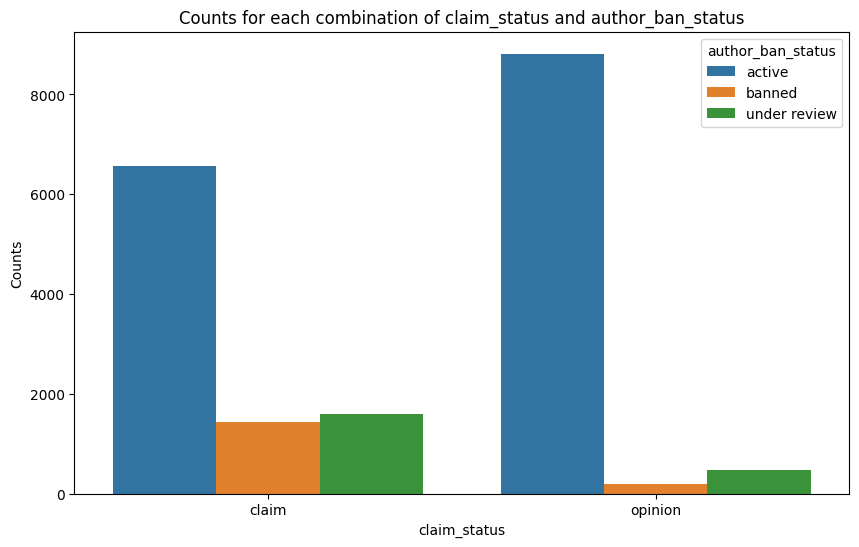

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group by 'claim_status' and 'author_ban_status' and get counts
grouped_counts = df.groupby(["claim_status", "author_ban_status"]).size().reset_index(name='counts')
# seaborn to create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="claim_status", y="counts", hue="author_ban_status", data=grouped_counts)
plt.ylabel('Counts')
plt.title('Counts for each combination of claim_status and author_ban_status')
plt.show()

- "claim_status" là "claim":
Số lượng video có author_ban_status là "active" cao nhất (khoảng 6500).
Số lượng video có author_ban_status là "banned" và "under review" tương đối thấp (khoảng 1500 và 1600).
- "claim_status" là "opinion":
Số lượng video có author_ban_status là "active" cao nhất (khoảng 8500).
Số lượng video có author_ban_status là "banned" và "under review" thấp hơn đáng kể (khoảng 200 và 500).

In [ ]:
# Calculate the median video share count of `author_ban_status`
df.groupby("author_ban_status")["video_share_count"].median()

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


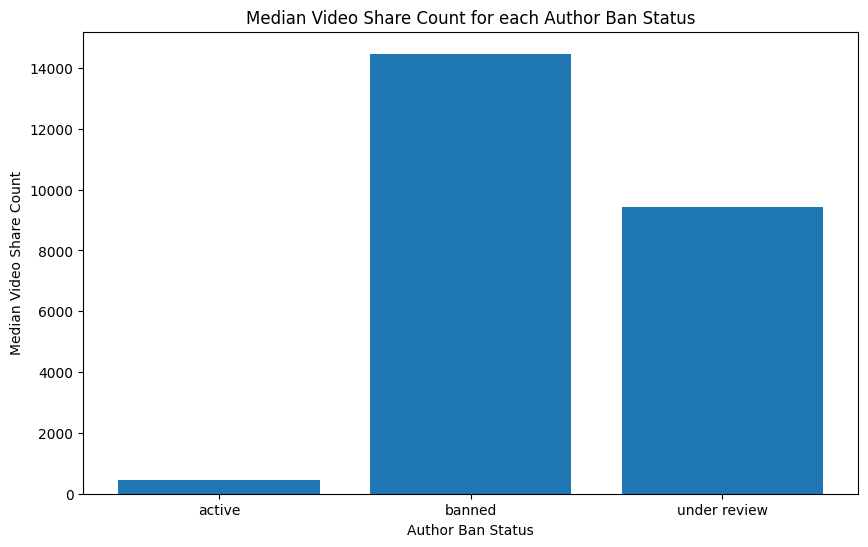

In [ ]:
import matplotlib.pyplot as plt

# Calculate the median video share count of 'author_ban_status'
median_counts = df.groupby("author_ban_status")["video_share_count"].median().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.bar(median_counts['author_ban_status'], median_counts['video_share_count'])
plt.xlabel('Author Ban Status')
plt.ylabel('Median Video Share Count')
plt.title('Median Video Share Count for each Author Ban Status')
plt.show()

In [ ]:
# Calculate the count, mean, and median of engagement columns
# grouped by `author_ban_status`
df.groupby(["author_ban_status"]).agg({"video_view_count" : ["count", "mean", "median"],
                                         "video_like_count": ["mean", "median"],
                                         "video_share_count": ["mean", "median"]})

video_view_count                          video_like_count  \
                             count           mean    median             mean   
author_ban_status                                                              
active                       15383  215927.039524    8616.0     71036.533836   
banned                        1635  445845.439144  448201.0    153017.236697   
under review                  2066  392204.836399  365245.5    128718.050339   

                            video_share_count           
                     median              mean   median  
author_ban_status                                       
active               2222.0      14111.466164    437.0  
banned             105573.0      29998.942508  14468.0  
under review        71204.5      25774.696999   9444.0

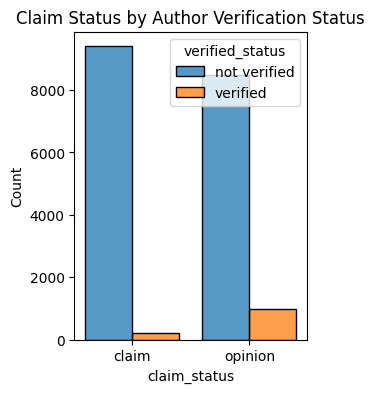

In [ ]:
# Create a histogram of `claim_status` by `verification_status`
plt.figure(figsize = (3, 4))
sns.histplot(data = df,
             x = "claim_status",
             hue = "verified_status",
             multiple = "dodge",
             shrink = 0.8)
plt.title("Claim Status by Author Verification Status")
plt.show()

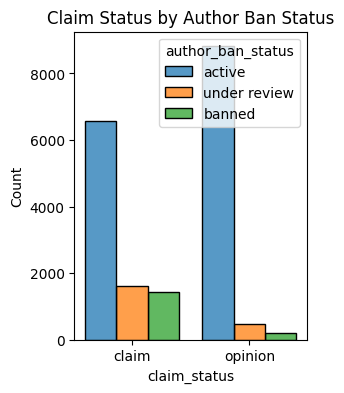

In [ ]:
# Create a histogram of `claim_status` by `author_ban_status`
plt.figure(figsize = (3, 4))
sns.histplot(data = df,
             x = "claim_status",
             hue = "author_ban_status",
             hue_order = ["active", "under review", "banned"],
             multiple = "dodge",
             shrink = 0.8)
plt.title("Claim Status by Author Ban Status")
plt.show()

In [ ]:


data_eng = df.copy()

data_eng["likes_per_view"] = df["video_like_count"] / df["video_view_count"]
data_eng["comments_per_view"] = df["video_comment_count"] / df["video_view_count"]
data_eng["shares_per_view"] = df["video_share_count"] / df["video_view_count"]

# Compile information to calculate the count, mean, and median
# grouped by `claim_status` and `author_ban_status`
data_eng.groupby(["claim_status", "author_ban_status"]).agg({"likes_per_view" : ["count", "mean", "median"],
                                                            "comments_per_view": ["mean", "median"],
                                                            "shares_per_view": ["mean", "median"]})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view           shares_per_view  \
                                            mean    median            mean   
claim_status author_ban_status                                               
claim        active                     0.001393  0.000776        0.065456   
             banned                     0.001377  0.000746        0.067893   
             under review               0.001367  0.000789        0.065733   
opinion      active                     0.000517  0.000252        0.043729   
             banned                     0.000434  0.000193        0.040531   
             under review               0.000536  0.000293        0.044472   

                                          
                                  median  
claim_status author_ban_status            
claim        active             0.049279  
             banned             0.051606  
             under review       0.049967  
opinion      active             0.032405  
             banned             0.030728  
             under review       0.035027

1. Tỷ lệ thích trên mỗi lượt xem (likes_per_view):
Nhìn chung, tỷ lệ này cao hơn đối với các video có claim_status là "claim" so với "opinion".
Trong nhóm "claim", tỷ lệ này cao nhất đối với các video bị cấm (banned).
2. Tỷ lệ bình luận trên mỗi lượt xem (comments_per_view):
Tỷ lệ này rất thấp, cho thấy số lượng bình luận thường nhỏ hơn nhiều so với số lượt xem.
Tỷ lệ này cao hơn đối với các video có claim_status là "claim".
3. Tỷ lệ chia sẻ trên mỗi lượt xem (shares_per_view):
Tỷ lệ này cũng khá thấp.
Tương tự như tỷ lệ thích, tỷ lệ này cao hơn đối với các video có claim_status là "claim".
Kết luận:

Các video có claim_status là "claim" thường nhận được nhiều tương tác hơn (thích, bình luận, chia sẻ) trên mỗi lượt xem so với các video có claim_status là "opinion".
Các video bị cấm (banned) có xu hướng nhận được nhiều tương tác hơn trong nhóm claim.